In [1]:
import warnings
import dreamerv3
from dreamerv3 import embodied
from embodied.envs import tabular_navigation
from embodied.core.basics import convert
import jax.numpy as jnp
import matplotlib.pyplot as plt
import collections
import numpy as np

# inline plotting
%matplotlib inline
# auto reload
%load_ext autoreload
%autoreload 2

In [2]:
config = embodied.Config(dreamerv3.configs['defaults'])
config = config.update(dreamerv3.configs['tmaze'])
config = config.update({
  "logdir": "dreamerv3/logs/director",
  "jax.jit": True,
  "jax.platform": "cpu",
  "run.steps": 500})
config = embodied.Flags(config).parse()


In [3]:
config.run.log_every

100

In [3]:
logdir = embodied.Path(config.logdir)
step = embodied.Counter()
logger = embodied.Logger(step, [
    embodied.logger.TerminalOutput(),
    # embodied.logger.JSONLOutput(logdir, 'metrics.jsonl'),
    # embodied.logger.TensorBoardOutput(logdir),
    # embodied.logger.WandBOutput(logdir.name, config),
    # embodied.logger.MLFlowOutput(logdir.name),
])

In [4]:
env = tabular_navigation.TabularNavigationEnv("tmaze")
env = dreamerv3.wrap_env(env, config)
env = embodied.BatchEnv([env], parallel=False)

dict_keys(['reward', 'is_first', 'is_last', 'local_window', 'is_terminal', 'observation'])
[('reward', array([0.], dtype=float32)), ('is_first', array([ True])), ('is_last', array([False])), ('is_terminal', array([False])), ('observation', array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]))]
(1, 6, 7, 1)


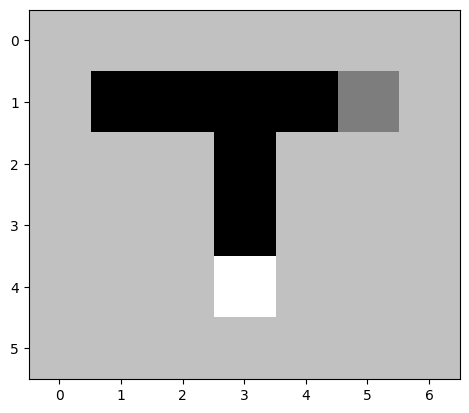

In [5]:
outs = env.step({'action':jnp.array([0, 0, 1, 0]).reshape(1, -1), 'reset': [False]})
# observation is just a one-hot encoding of the state (8-dim) with a one-hot encoding
# of the goal (2-dim) appended to it
print(outs.keys())
print([(k, v) for k, v in outs.items() if k != 'local_window'])
print(outs['local_window'].shape)
plt.imshow(outs['local_window'][0, :, :, :], cmap='gray')
plt.show()

In [6]:
# create agent
agent = dreamerv3.Agent(env.obs_space, env.act_space, step, config)
replay = embodied.replay.Uniform(
    config.batch_length, config.replay_size,)
args = embodied.Config(
    **config.run, logdir=config.logdir,
    batch_steps=config.batch_size * config.batch_length)
# clear previous checkpoints before running
!rm -rf dreamerv3/logs/director/*

Encoder CNN shapes: {}
Encoder MLP shapes: {'observation': (10,)}
Decoder CNN shapes: {}
Decoder MLP shapes: {'observation': (10,)}
JAX devices (1): [CpuDevice(id=0)]
Policy devices: TFRT_CPU_0
Train devices:  TFRT_CPU_0
Tracing train function.
Optimizer model_opt has 88,576 variables.
Optimizer actor_opt has 11,012 variables.
Optimizer critic_opt has 11,141 variables.
Optimizer critic_opt has 11,141 variables.


In [7]:
embodied.run.train(agent, env, replay, logger, args)


Logdir dreamerv3/logs/director
Observation space:
  reward           Space(dtype=float32, shape=(), low=-inf, high=inf)
  is_first         Space(dtype=bool, shape=(), low=False, high=True)
  is_last          Space(dtype=bool, shape=(), low=False, high=True)
  is_terminal      Space(dtype=bool, shape=(), low=False, high=True)
  local_window     Space(dtype=uint8, shape=(6, 7, 1), low=0, high=255)
  observation      Space(dtype=float32, shape=(10,), low=-inf, high=inf)
Action space:
  reset            Space(dtype=bool, shape=(), low=False, high=True)
  action           Space(dtype=float32, shape=(4,), low=0, high=1)
Prefill train dataset.
Episode has 12 steps and return -8.0.
Episode has 7 steps and return 8.0.
Episode has 12 steps and return -6.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -11.0.
Episode has 12 steps and return -8.0.
Episode has 12 steps and return -7.0.
Episode has 12 steps and return -12.0.
Episode has 12 steps and return -10.0.
Episode has

──────────────────────────────────────────────────── Step 294 ─────────────────────────────────────────────────────

episode/length 12 / episode/score -7 / episode/sum_abs_reward 7 / episode/reward_rate 0.54


Did not find any checkpoint.
Writing checkpoint: dreamerv3/logs/director/checkpoint.ckpt
Start training loop.
Wrote checkpoint: dreamerv3/logs/director/checkpoint.ckpt
Tracing policy function.
Tracing policy function.
Tracing train function.
Tracing report function.
Tracing report function.


──────────────────────────────────────────────────── Step 301 ─────────────────────────────────────────────────────

train/actor_opt_actor_opt_grad_overflow 0 / train/actor_opt_actor_opt_grad_scale 1e4 / train/actor_opt_grad_norm 
8.8e-5 / train/actor_opt_grad_steps 1 / train/actor_opt_loss -1.56 / train/cont_avg 0.92 / train/cont_loss_mean 
0.58 / train/cont_loss_std 0.31 / train/cont_neg_acc 0.25 / train/cont_neg_loss 1.12 / train/cont_pos_acc 0.77 / 
train/cont_pos_loss 0.53 / train/cont_pred 0.61 / train/cont_rate 0.92 / train/dyn_loss_mean 2.65 / 
train/dyn_loss_std 0.38 / train/expl_manager-critic_critic_opt_critic_opt_grad_overflow 0 / 
train/expl_manager-critic_critic_opt_critic_opt_grad_scale 1e4 / train/expl_manager-critic_critic_opt_grad_norm 
2.71 / train/expl_manager-critic_critic_opt_grad_steps 1 / train/expl_manager-critic_critic_opt_loss 1.4e4 / 
train/expl_manager-critic_mag 0 / train/expl_manager-critic_max 0 / train/expl_manager-critic_mean 0 / 
train/expl_manager-critic_min 0 / train/expl_manager-critic_std 0 / 
train/extr_manager-critic_critic_opt_critic_opt_grad_overflow 0 / 
train/extr_manager-critic_critic_opt_critic_opt_grad_scale 1e4 / train/extr_manager-critic_critic_opt_grad_norm 
2.74 / train/extr_manager-critic_critic_opt_grad_steps 1 / train/extr_manager-critic_critic_opt_loss 1.4e4 / 
train/extr_manager-critic_mag 0 / train/extr_manager-critic_max 0 / train/extr_manager-critic_mean 0 / 
train/extr_manager-critic_min 0 / train/extr_manager-critic_std 0 / train/manager_action_mag 0 / 
train/manager_action_max 0 / train/manager_action_mean 0 / train/manager_action_min 0 / train/manager_action_std 0 
/ train/manager_actor_opt_loss -1.56 / train/manager_adv_mag 0.19 / train/manager_adv_max 0.19 / 
train/manager_adv_mean 0.06 / train/manager_adv_min 0 / train/manager_adv_std 0.04 / 
train/manager_expl_return_normed_mag 2.13 / train/manager_expl_return_normed_max 2.13 / 
train/manager_expl_return_normed_mean 0.68 / train/manager_expl_return_normed_min -1.3e-3 / 
train/manager_expl_return_normed_std 0.45 / train/manager_expl_return_rate 0.58 / train/manager_expl_return_raw_mag
2.13 / train/manager_expl_return_raw_max 2.13 / train/manager_expl_return_raw_mean 0.68 / 
train/manager_expl_return_raw_min 0 / train/manager_expl_return_raw_std 0.45 / train/manager_expl_reward_mag 0.37 /
train/manager_expl_reward_max 0.37 / train/manager_expl_reward_mean 0.17 / train/manager_expl_reward_min 0 / 
train/manager_expl_reward_std 0.08 / train/manager_extr_return_normed_mag 2.2e-3 / 
train/manager_extr_return_normed_max 1.8e-3 / train/manager_extr_return_normed_mean -1.9e-4 / 
train/manager_extr_return_normed_min -2.2e-3 / train/manager_extr_return_normed_std 5.1e-4 / 
train/manager_extr_return_rate 0 / train/manager_extr_return_raw_mag 2.2e-3 / train/manager_extr_return_raw_max 
1.8e-3 / train/manager_extr_return_raw_mean -2e-4 / train/manager_extr_return_raw_min -2.2e-3 / 
train/manager_extr_return_raw_std 5.1e-4 / train/manager_extr_reward_mag 1.1e-3 / train/manager_extr_reward_max 
1.1e-3 / train/manager_extr_reward_mean -4.7e-5 / train/manager_extr_reward_min -1.1e-3 / 
train/manager_extr_reward_std 2.4e-4 / train/manager_policy_entropy_mag 1.39 / train/manager_policy_entropy_max 
1.39 / train/manager_policy_entropy_mean 1.18 / train/manager_policy_entropy_min 0.52 / 
train/manager_policy_entropy_std 0.14 / train/manager_policy_logprob_mag 0 / train/manager_policy_logprob_max 0 / 
train/manager_policy_logprob_mean 0 / train/manager_policy_logprob_min 0 / train/manager_policy_logprob_std 0 / 
train/manager_policy_randomness_mag 1 / train/manager_policy_randomness_max 1 / 
train/manager_policy_randomness_mean 0.85 / train/manager_policy_randomness_min 0.37 / 
train/manager_policy_randomness_std 0.1 / train/model_loss_mean 10.36 / train/model_loss_std 2.67 / 
train/model_opt_grad_norm 15.53 / train/model_opt_grad_steps 1 / train/model_opt_loss 1e5 / 
train/model_opt_model_opt_grad_overflow 0 / train/model_opt_model_opt_grad_scale 1e4 / train/observation_loss_mean 
6.58 / train/observation_loss_std 2.66 / train/post_ent_mag 15.6 /


Episode has 12 steps and return -4.0.
Episode has 12 steps and return -12.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -12.0.
Episode has 12 steps and return -12.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -8.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -6.0.
Episode has 12 steps and return -12.0.
Episode has 12 steps and return -8.0.
Episode has 12 steps and return -10.0.
Episode has 12 steps and return -12.0.


──────────────────────────────────────────────────── Step 489 ─────────────────────────────────────────────────────

episode/length 12 / episode/score -12 / episode/sum_abs_reward 12 / episode/reward_rate 0.92

In [10]:
class MiniDriver:

  _CONVERSION = {
      np.floating: np.float32,
      np.signedinteger: np.int32,
      np.uint8: np.uint8,
      bool: bool,
  }

  def __init__(self, env, **policy_kwargs):
    assert len(env) > 0
    self._env = env
    self._policy_kwargs = policy_kwargs
    self._on_steps = []
    self._on_episodes = []
    self._im_hist = []
    self._acts_hist = []
    self.reset()

  def reset(self):
    self._acts = {
        k: convert(np.zeros((len(self._env),) + v.shape, v.dtype))
        for k, v in self._env.act_space.items()}
    self._acts['reset'] = np.ones(len(self._env), bool)
    self._eps = [collections.defaultdict(list) for _ in range(len(self._env))]
    self._state = None
    del self._im_hist[:]
    del self._acts_hist[:]

  def on_step(self, callback):
    self._on_steps.append(callback)

  def on_episode(self, callback):
    self._on_episodes.append(callback)

  def __call__(self, policy, wm, steps=0, episodes=0):
    step, episode = 0, 0
    while step < steps or episode < episodes:
      step, episode = self._step(policy, wm, step, episode)

  def _step(self, policy, wm, step, episode):
    assert all(len(x) == len(self._env) for x in self._acts.values())
    # take current action
    # acts has keys 'action', 'reset'
    acts = {k: v for k, v in self._acts.items() if not k.startswith('log_')}
    obs = self._env.step(acts)
    obs = {k: convert(v) for k, v in obs.items()}
    # obs keys are:
    # reward, is_first, is_last, local_window, is_terminal, observation
    self._im_hist.append(obs['local_window'][0, :, :, :])
    assert all(len(x) == len(self._env) for x in obs.values()), obs
    # sample a new action
    acts, self._state = policy(obs, self._state, **self._policy_kwargs)
    acts = {k: convert(v) for k, v in acts.items()}
    # acts['action'] is shape [1, 4]
    self._acts_hist.append(np.argmax(acts['action'][0, :]))
    if obs['is_last'].any():
      mask = 1 - obs['is_last']
      acts = {k: v * self._expand(mask, len(v.shape)) for k, v in acts.items()}
    acts['reset'] = obs['is_last'].copy()
    self._acts = acts
    trns = {**obs, **acts}
    if obs['is_first'].any():
      for i, first in enumerate(obs['is_first']):
        if first:
          self._eps[i].clear()
    for i in range(len(self._env)):
      trn = {k: v[i] for k, v in trns.items()}
      [self._eps[i][k].append(v) for k, v in trn.items()]
      step += 1
    if obs['is_last'].any():
      for i, done in enumerate(obs['is_last']):
        if done:
          ep = {k: convert(v) for k, v in self._eps[i].items()}
          episode += 1
    return step, episode

  def _expand(self, value, dims):
    while len(value.shape) < dims:
      value = value[..., None]
    return value



In [9]:
driver = MiniDriver(env)
policy = lambda *args: agent.policy(*args, mode='train')
wm = agent.agent.wm

In [11]:
driver(policy, wm, steps=12, episodes=1)

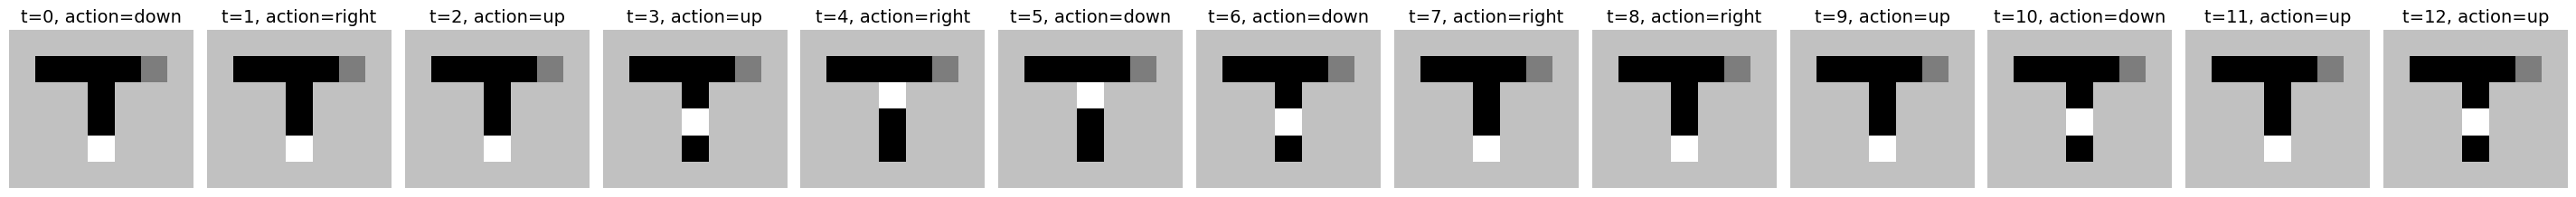

In [45]:
T = len(driver._im_hist)
idx2action = {0: "up", 1: "right", 2: "down", 3: "left"}
fig, axs = plt.subplots(1, T, figsize=(T * 2.2, 2.2))
for ax in axs:
  ax.axis('off')

for t in range(len(driver._im_hist)):
  axs[t].imshow(driver._im_hist[t], cmap='gray')
  axs[t].set_title(f"t={t}, action={idx2action[driver._acts_hist[t]]}", fontsize=14)

plt.tight_layout()
plt.show()
